For this first assignment we will study the golden ball player of the 2023 Women's World Cup, Aitana Bonmatí.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from statsbombpy import sb
from mplsoccer import Pitch

First of all let's find the competition we need.

In [2]:
competitions_df = sb.competitions()
competitions_df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [3]:
competitions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             67 non-null     int64 
 1   season_id                  67 non-null     int64 
 2   country_name               67 non-null     object
 3   competition_name           67 non-null     object
 4   competition_gender         67 non-null     object
 5   competition_youth          67 non-null     bool  
 6   competition_international  67 non-null     bool  
 7   season_name                67 non-null     object
 8   match_updated              67 non-null     object
 9   match_updated_360          51 non-null     object
 10  match_available_360        5 non-null      object
 11  match_available            67 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 5.5+ KB


In [4]:
competitions_df.competition_name.unique()

array(['1. Bundesliga', 'Champions League', 'Copa del Rey',
       "FA Women's Super League", 'FIFA U20 World Cup', 'FIFA World Cup',
       'Indian Super league', 'La Liga', 'Liga Profesional', 'Ligue 1',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [5]:
competition_name = "Women's World Cup"
competitions_df[competitions_df['competition_name'] == competition_name]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316
66,72,30,International,Women's World Cup,female,False,True,2019,2023-07-27T10:33:48.273734,2021-06-13T16:17:31.694,None,2023-07-27T10:33:48.273734


In [5]:
competition_id = 72
season_id = 107

wwc2023 = competitions_df[(competitions_df['competition_id'] == competition_id) & (competitions_df['season_id'] == season_id)]
wwc2023

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [6]:
help(sb.competition_events)

Help on function competition_events in module statsbombpy.sb:

competition_events(country: str, division: str, season: str, gender: str = 'male', split: bool = False, filters: dict = {}, fmt: str = 'dataframe', creds: dict = {'user': None, 'passwd': None}, include_360_metrics=False) -> Union[pandas.core.frame.DataFrame, dict]



In [7]:
matches_df = sb.matches(competition_id, season_id)
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               64 non-null     int64 
 1   match_date             64 non-null     object
 2   kick_off               64 non-null     object
 3   competition            64 non-null     object
 4   season                 64 non-null     object
 5   home_team              64 non-null     object
 6   away_team              64 non-null     object
 7   home_score             64 non-null     int64 
 8   away_score             64 non-null     int64 
 9   match_status           64 non-null     object
 10  match_status_360       64 non-null     object
 11  last_updated           64 non-null     object
 12  last_updated_360       64 non-null     object
 13  match_week             64 non-null     int64 
 14  competition_stage      64 non-null     object
 15  stadium                64

In [8]:
unique_home_teams = set(matches_df['home_team'])
unique_away_teams = set(matches_df['away_team'])

unique_teams = unique_home_teams.union(unique_away_teams)
unique_teams

{"Argentina Women's",
 "Australia Women's",
 "Brazil Women's",
 "Canada Women's",
 "China PR Women's",
 "Colombia Women's",
 "Costa Rica Women's",
 "Denmark Women's",
 "England Women's",
 "France Women's",
 "Germany Women's",
 "Haiti Women's",
 "Italy Women's",
 "Jamaica Women's",
 "Japan Women's",
 "Korea Republic Women's",
 "Morocco Women's",
 "Netherlands Women's",
 "New Zealand Women's",
 "Nigeria Women's",
 "Norway Women's",
 "Panama Women's",
 "Philippines Women's",
 "Portugal Women's",
 "Republic of Ireland Women's",
 "South Africa Women's",
 "Spain Women's",
 "Sweden Women's",
 "Switzerland Women's",
 "United States Women's",
 "Vietnam Women's",
 "Zambia Women's"}

In [9]:
top2_teams = ["Spain Women's", "England Women's"]
top4_teams = top2_teams + ["Sweden Women's", "Australia Women's"]
top8_teams = top4_teams + ["Netherlands Women's", "Japan Women's", "Colombia Women's", "France Women's"]

In [10]:
team_name = "Spain Women's"
team_mask = (matches_df['home_team'] == team_name) | (matches_df['away_team'] == team_name)
team_matches_df = matches_df[team_mask]
team_matches_df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3906390,2023-08-20,13:00:00.000,International - Women's World Cup,2023,Spain Women's,England Women's,1,0,available,...,2023-08-22T19:38:43.965521,7,Final,Accor Stadium,Tori Penso,Jorge Vilda,Sarina Glotzbach-Wiegman,1.1.0,2,2
3,3904628,2023-08-15,11:00:00.000,International - Women's World Cup,2023,Spain Women's,Sweden Women's,2,1,available,...,2023-08-16T11:30:31.556462,6,Semi-finals,Eden Park,Edina Alves Batista,Jorge Vilda,Peter Gerhardsson,1.1.0,2,2
4,3893806,2023-07-26,10:30:00.000,International - Women's World Cup,2023,Spain Women's,Zambia Women's,5,0,available,...,2023-08-15T02:58:57.266594,2,Group Stage,Eden Park,Hyeon-Jeong Oh,Jorge Vilda,Bruce Mwape,1.1.0,2,2
7,3893822,2023-07-31,10:00:00.000,International - Women's World Cup,2023,Japan Women's,Spain Women's,4,0,available,...,2023-08-15T03:20:22.749909,3,Group Stage,Wellington Regional Stadium,Katja Koroleva,Futoshi Ikeda,Jorge Vilda,1.1.0,2,2
15,3902240,2023-08-11,04:00:00.000,International - Women's World Cup,2023,Spain Women's,Netherlands Women's,2,1,available,...,2023-08-14T09:22:25.109084,5,Quarter-finals,Wellington Regional Stadium,Stéphanie Frappart,Jorge Vilda,Andries Jonker,1.1.0,2,2
23,3901733,2023-08-05,08:00:00.000,International - Women's World Cup,2023,Switzerland Women's,Spain Women's,1,5,available,...,2023-08-27T22:14:35.209354,4,Round of 16,Eden Park,Cheryl Foster,Inka Grings,Jorge Vilda,1.1.0,2,2
37,3893791,2023-07-21,10:30:00.000,International - Women's World Cup,2023,Spain Women's,Costa Rica Women's,3,0,available,...,2023-08-24T15:33:45.726341,1,Group Stage,Wellington Regional Stadium,Casey Reibelt,Jorge Vilda,Amelia Valverde,1.1.0,2,2


In [11]:
team_matches_id = list(team_matches_df.match_id)
team_matches_id

[3906390, 3904628, 3893806, 3893822, 3902240, 3901733, 3893791]

In [13]:
wwc2023_events = sb.competition_events(
    country=wwc2023['country_name'].iloc[0],
    division=wwc2023['competition_name'].iloc[0],
    season=wwc2023['season_name'].iloc[0],
    gender=wwc2023['competition_gender'].iloc[0],
    # split=True
)

In [127]:
# cols = [ 'pass_body_part', 'pass_end_location', 'pass_height', 'pass_outcome', 'pass_shot_assist', 'pass_goal_assist', 'pass_through_ball', 'pass_type', 'under_pressure']

In [17]:
cols = ['id', 'index', 'match_id', 'player', 'type', 'location', 'carry_end_location', 'pass_end_location', 'pass_shot_assist', 'pass_goal_assist', 'pass_through_ball']

In [27]:
gray_color = '#c0c0c0'

# Function to determine the color based on the conditions
def determine_color_and_alpha_and_zorder(row):
    if row['pass_goal_assist'] == True:
        color = 'green'
        alpha = 1.
        zorder = 2
    elif row['pass_shot_assist'] == True:
        color = 'blue'
        alpha = 1.
        zorder = 2
    elif row['pass_through_ball'] == True:
        color = 'red'
        alpha = 1.
        zorder = 2
    else:
        color = gray_color
        alpha = .15
        zorder = 1

    return color, alpha, zorder

In [28]:
match_id = 3901733
match_events = wwc2023_events[wwc2023_events['match_id'] == match_id].sort_values('index')
# match_events[match_events.pass_shot_assist == True][cols]

In [38]:
# aitana_forward_pass_not_preceded_by_carry_df[cols]

In [39]:
# only_pass_colors

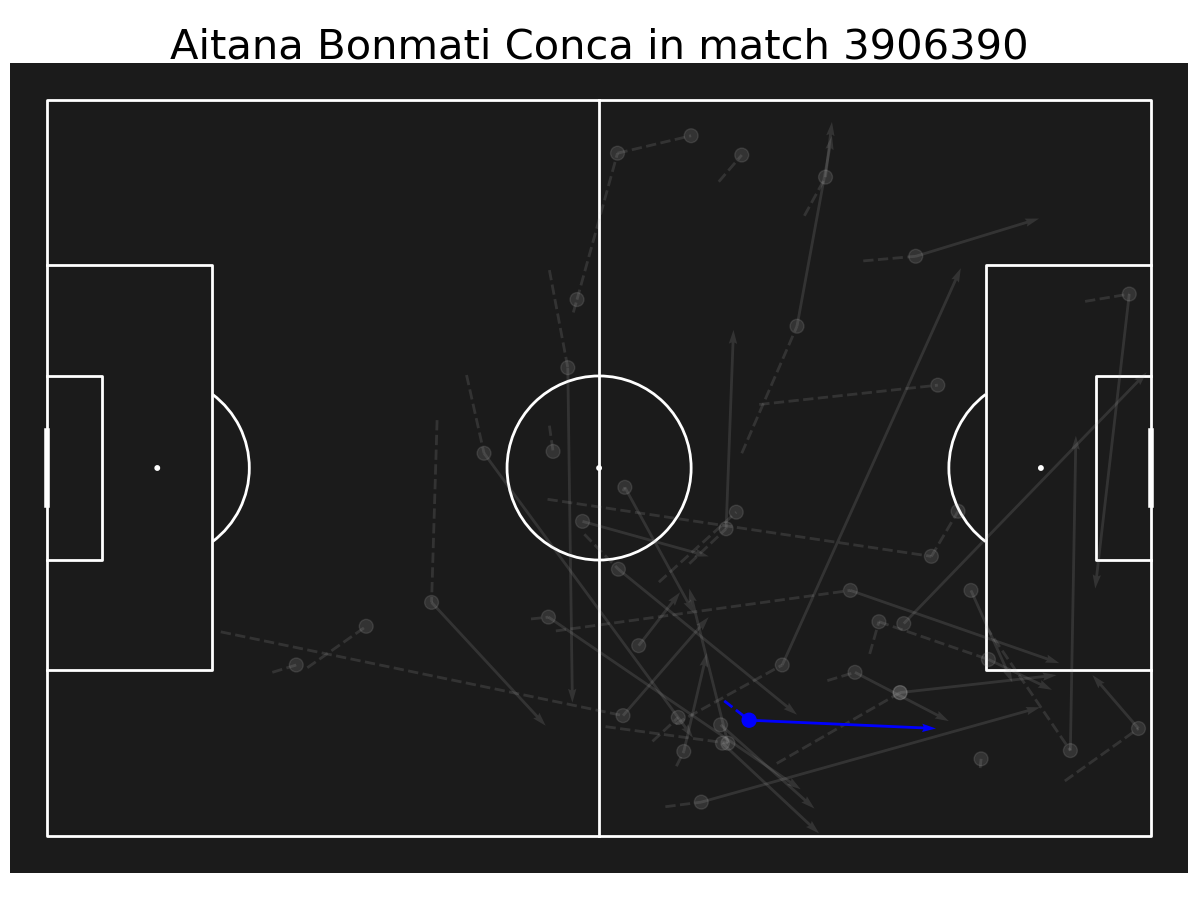

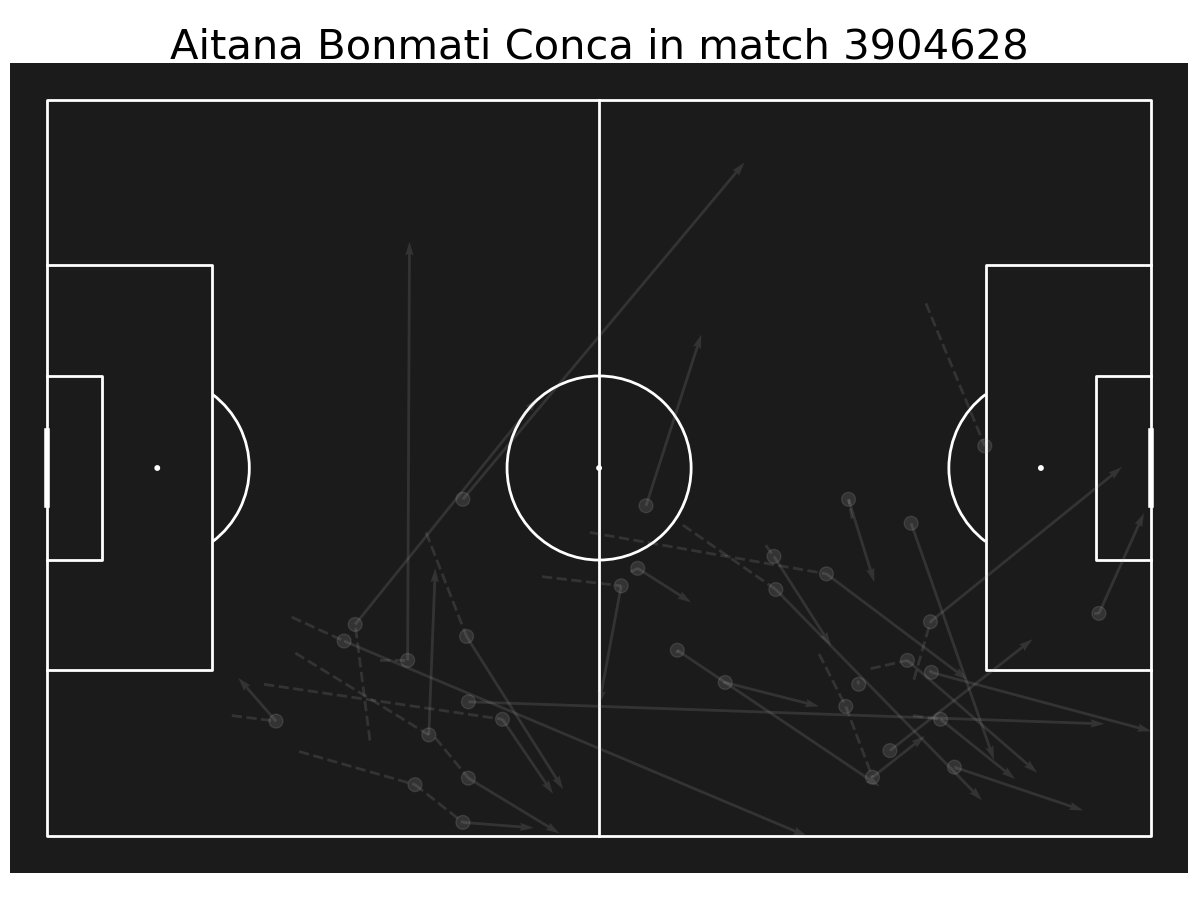

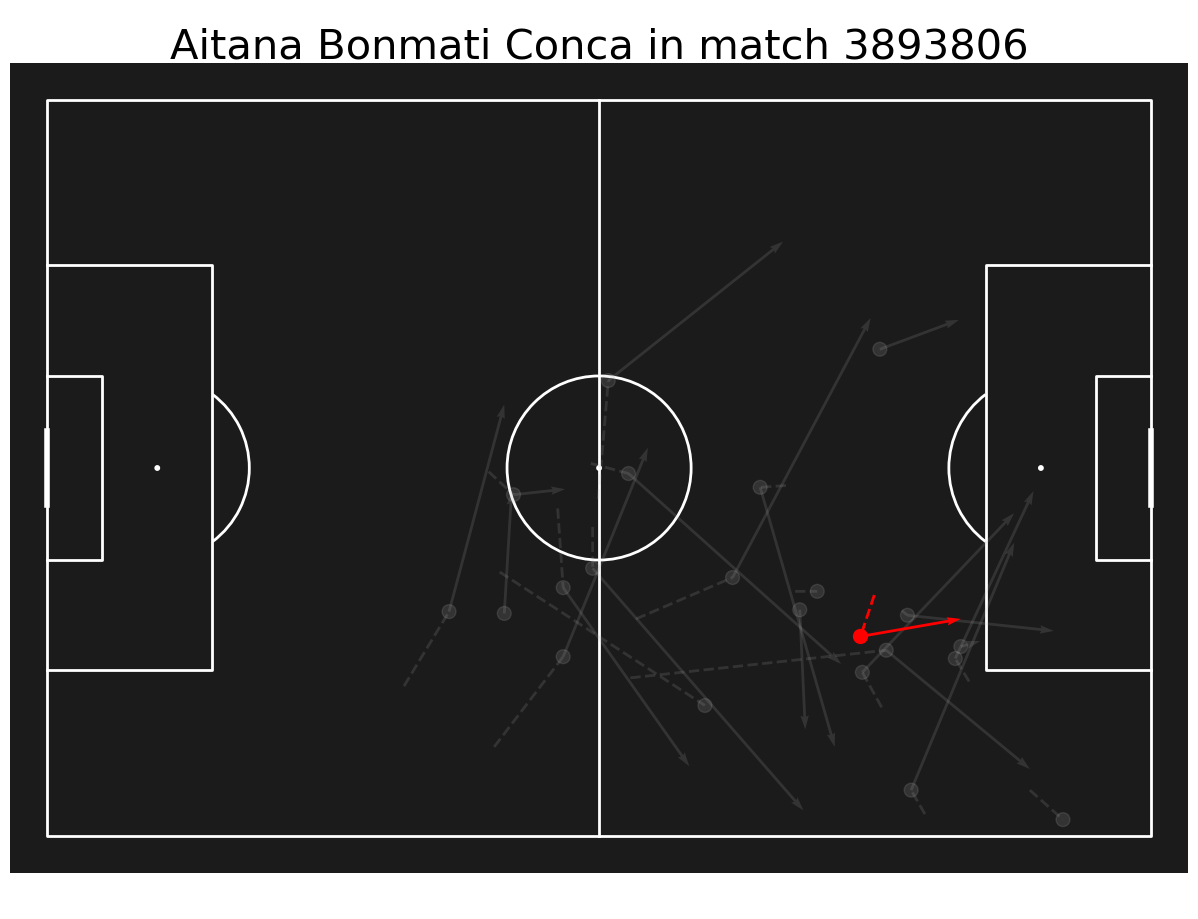

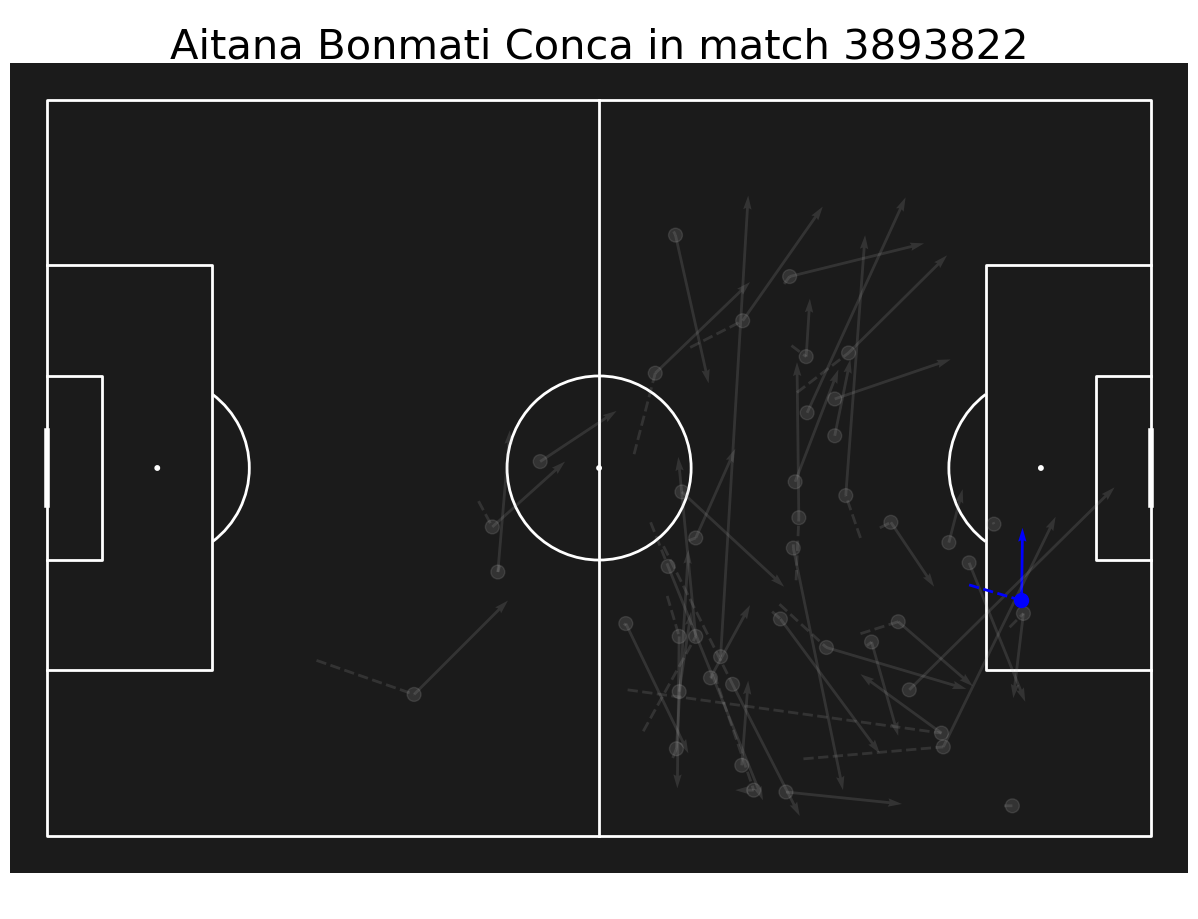

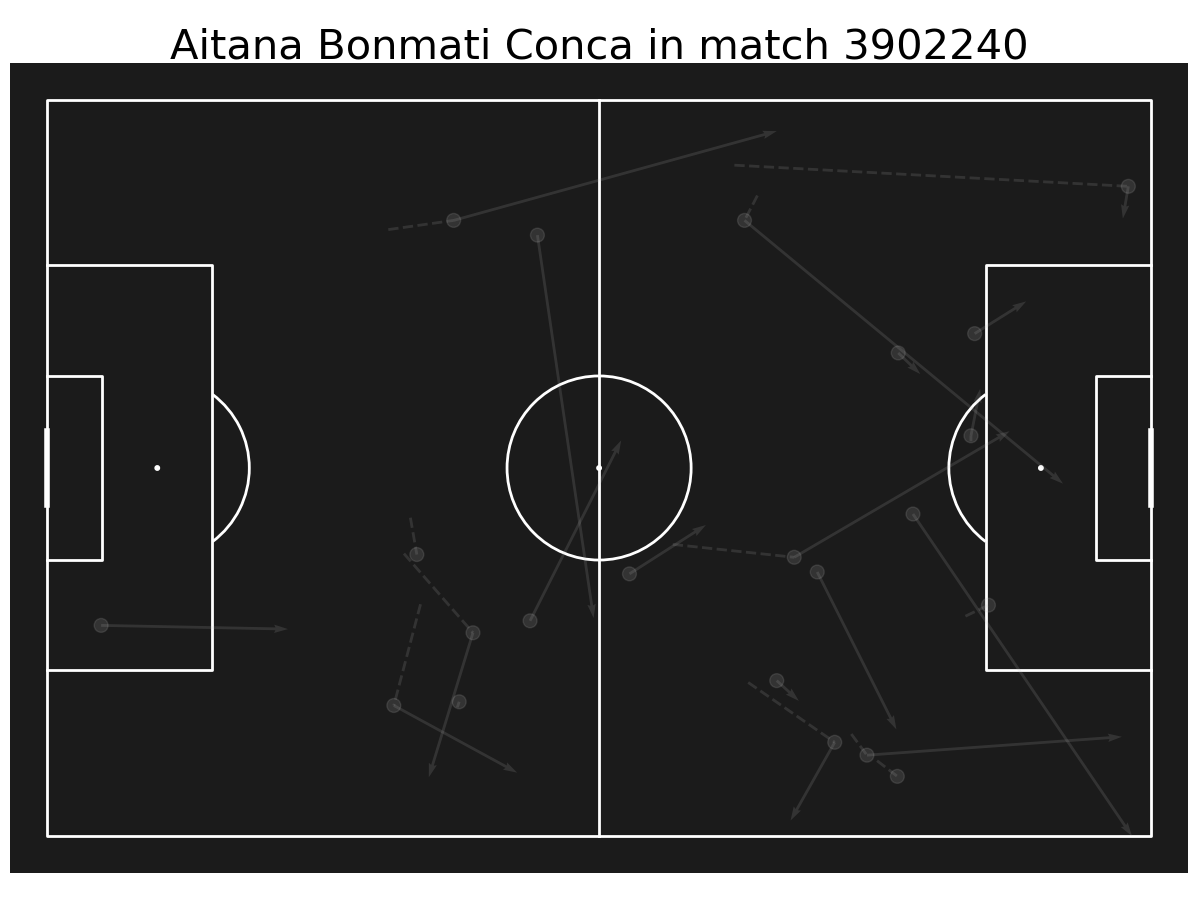

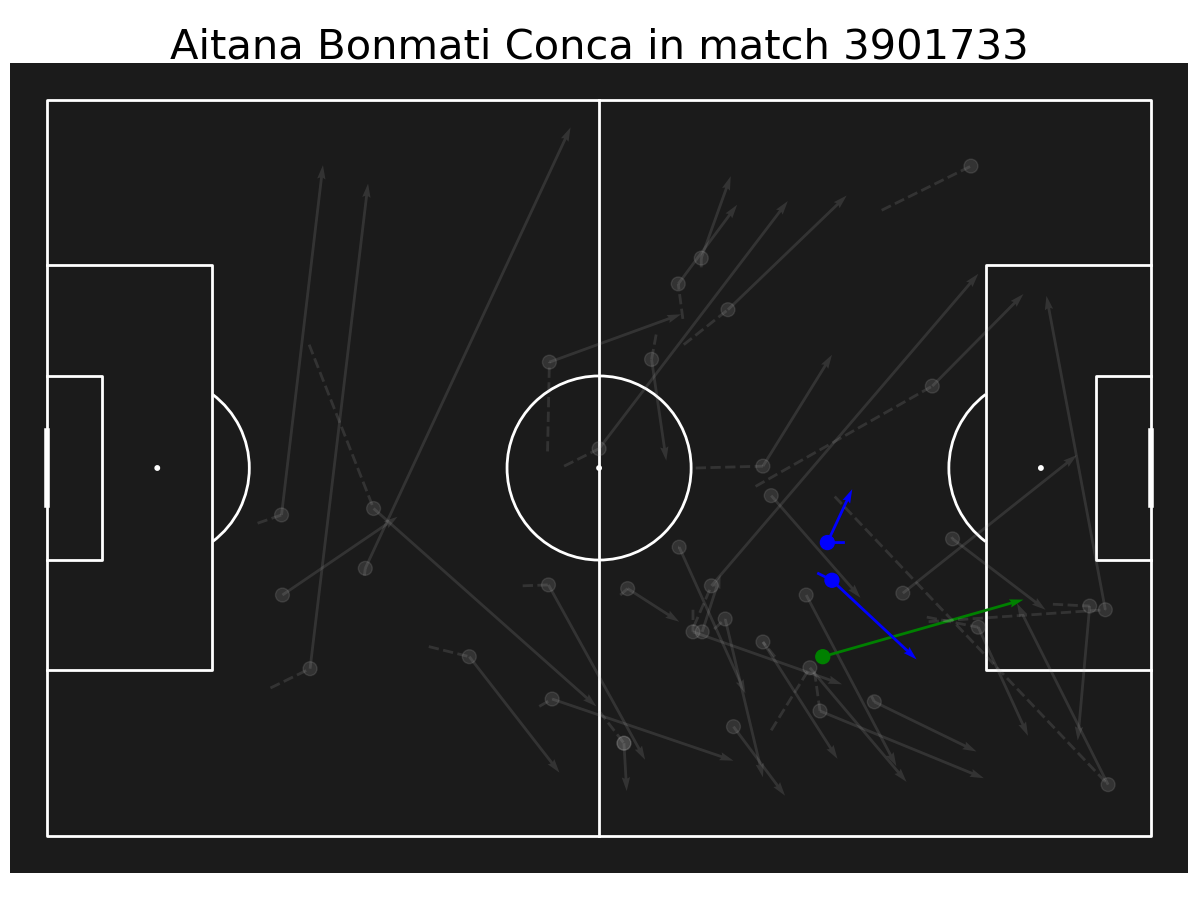

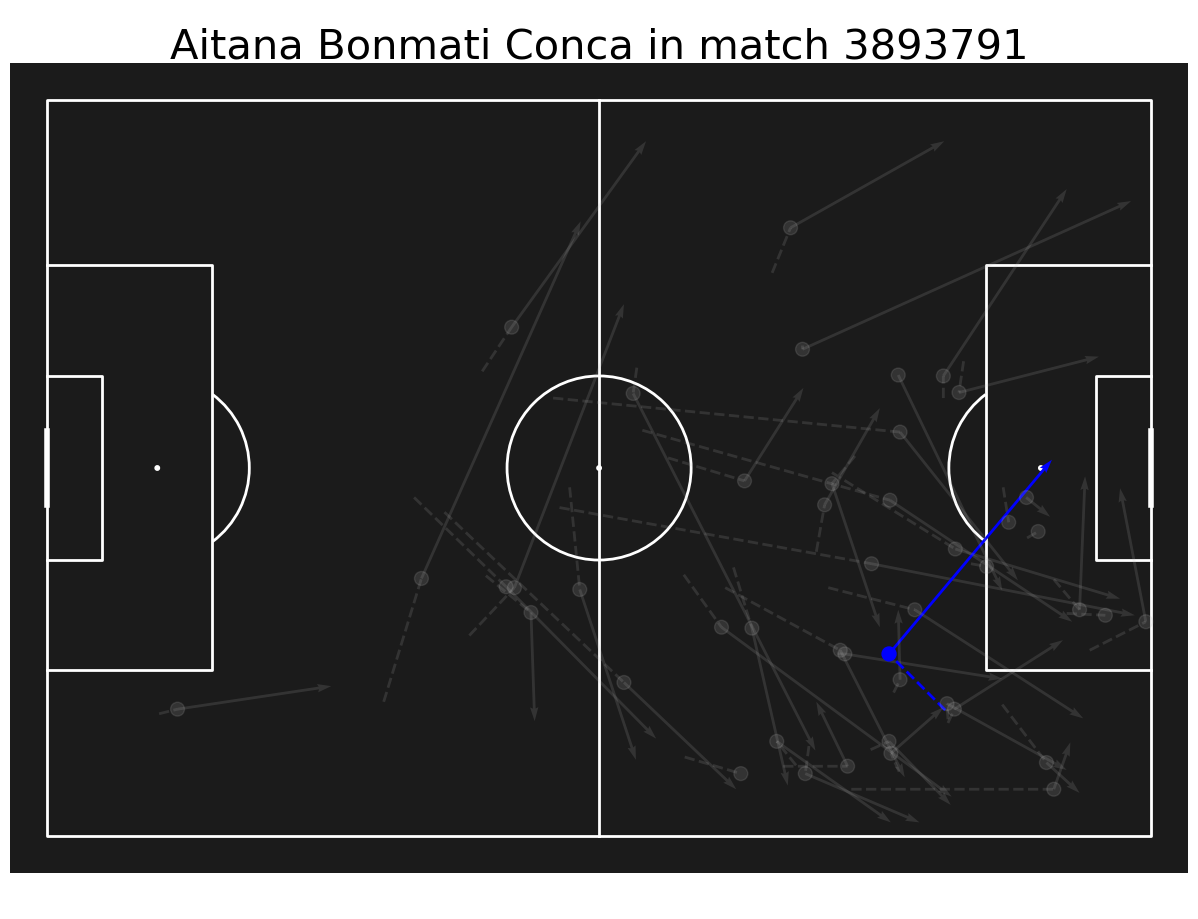

In [30]:
events_between_carry_and_pass = ['Dribble', 'Pressure']
player_name = "Aitana Bonmati Conca"

line_width = 2
circle_size = 100
circle_alpha = 1
line_alpha = .4

gray_color = '#c0c0c0'
black_color = '#1B1B1B'  # '#040200', '#1B1B1B'


for match_id in team_matches_id:
    match_events = wwc2023_events[wwc2023_events['match_id'] == match_id].sort_values('index')

    # Passes
    pass_not_preceded_by_carry_mask = (
        match_events['type'].eq('Pass') &
        ~(match_events['type'].shift(1).eq('Carry') |
            (match_events['type'].shift(1).isin(events_between_carry_and_pass) &
             match_events['type'].shift(2).eq('Carry')
            )
        )
    )
    
    pass_not_preceded_by_carry_df = match_events[pass_not_preceded_by_carry_mask][cols]
    forward_pass_not_preceded_by_carry_df = pass_not_preceded_by_carry_df[pass_not_preceded_by_carry_df['location'].apply(lambda x: x[0]) < pass_not_preceded_by_carry_df['pass_end_location'].apply(lambda x: x[0])]
    aitana_forward_pass_not_preceded_by_carry_df = forward_pass_not_preceded_by_carry_df[forward_pass_not_preceded_by_carry_df['player'] == player_name]

    only_pass_start_x = [location[0] for location in aitana_forward_pass_not_preceded_by_carry_df['location']]
    only_pass_start_y = [location[1] for location in aitana_forward_pass_not_preceded_by_carry_df['location']]
    only_pass_end_x = [location[0] for location in aitana_forward_pass_not_preceded_by_carry_df['pass_end_location']]
    only_pass_end_y = [location[1] for location in aitana_forward_pass_not_preceded_by_carry_df['pass_end_location']]

    only_pass_colors_and_alphas = aitana_forward_pass_not_preceded_by_carry_df.apply(determine_color_and_alpha_and_zorder, axis=1)
    only_pass_colors, only_pass_alphas, only_pass_zorder = zip(*only_pass_colors_and_alphas)

    
    # Carry + passes
    carry_and_pass_mask = (
        (match_events['type'].eq('Carry') & 
         match_events['type'].shift(-1).eq('Pass') &
         match_events['player'].eq(match_events['player'].shift(-1))
        ) |
        (match_events['type'].eq('Carry') & 
         match_events['type'].shift(-1).isin(events_between_carry_and_pass) & 
         match_events['type'].shift(-2).eq('Pass') & 
         match_events['player'].eq(match_events['player'].shift(-2))
        )
    )
    
    carry_and_pass_df = match_events[carry_and_pass_mask][cols]
    carry_and_pass_df['next_type'] = match_events['type'].shift(-1).where(carry_and_pass_mask)
    
    carry_and_pass_df['pass_location'] = match_events['location'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_location'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['location'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    
    carry_and_pass_df['pass_end_location'] = match_events['pass_end_location'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_end_location'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_end_location'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    carry_and_pass_df['pass_shot_assist'] = match_events['pass_shot_assist'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_shot_assist'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_shot_assist'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    carry_and_pass_df['pass_goal_assist'] = match_events['pass_goal_assist'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_goal_assist'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_goal_assist'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    carry_and_pass_df['pass_through_ball'] = match_events['pass_through_ball'].shift(-1).where(carry_and_pass_mask)
    carry_and_pass_df['pass_through_ball'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_through_ball'].shift(-2).where(carry_and_pass_mask),
                                            inplace=True)
    forward_carry_and_pass_df = carry_and_pass_df[carry_and_pass_df['location'].apply(lambda x: x[0]) < carry_and_pass_df['pass_end_location'].apply(lambda x: x[0])]
    aitana_forward_carry_and_pass_df = forward_carry_and_pass_df[forward_carry_and_pass_df['player'] == player_name]

    carry_start_x = [location[0] for location in aitana_forward_carry_and_pass_df['location']]
    carry_start_y = [location[1] for location in aitana_forward_carry_and_pass_df['location']]
    pass_start_x = [location[0] for location in aitana_forward_carry_and_pass_df['pass_location']]
    pass_start_y = [location[1] for location in aitana_forward_carry_and_pass_df['pass_location']]
    pass_end_x = [location[0] for location in aitana_forward_carry_and_pass_df['pass_end_location']]
    pass_end_y = [location[1] for location in aitana_forward_carry_and_pass_df['pass_end_location']]

    carry_and_pass_colors_and_alphas = aitana_forward_carry_and_pass_df.apply(determine_color_and_alpha_and_zorder, axis=1)
    carry_and_pass_colors, carry_and_pass_alphas, carry_and_pass_zorder = zip(*carry_and_pass_colors_and_alphas)


    # Carrys
    carry_mask = match_events['type'].eq('Carry')

    carry_not_followed_by_pass_mask = carry_mask & ~carry_and_pass_mask
    
    carry_not_followed_by_pass_df = match_events[carry_not_followed_by_pass_mask][cols]
    forward_carry_not_followed_by_pass_df = carry_not_followed_by_pass_df[carry_not_followed_by_pass_df['location'].apply(lambda x: x[0]) < carry_not_followed_by_pass_df['carry_end_location'].apply(lambda x: x[0])]
    aitana_forward_carry_not_followed_by_pass_df = forward_carry_not_followed_by_pass_df[forward_carry_not_followed_by_pass_df['player'] == player_name]

    only_carry_start_x = [location[0] for location in aitana_forward_carry_not_followed_by_pass_df['location']]
    only_carry_start_y = [location[1] for location in aitana_forward_carry_not_followed_by_pass_df['location']]
    only_carry_end_x = [location[0] for location in aitana_forward_carry_not_followed_by_pass_df['carry_end_location']]
    only_carry_end_y = [location[1] for location in aitana_forward_carry_not_followed_by_pass_df['carry_end_location']]

    only_carry_colors_and_alphas = aitana_forward_carry_not_followed_by_pass_df.apply(determine_color_and_alpha_and_zorder, axis=1)
    only_carry_colors, only_carry_alphas, only_carry_zorder = zip(*only_carry_colors_and_alphas)



    # Plot   
    pitch = Pitch(line_color='white', pitch_color=black_color)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    
    # Plot passes
    pitch.scatter(only_pass_start_x, only_pass_start_y, alpha=only_pass_alphas, s=circle_size, color=only_pass_colors,
                  ax=ax['pitch'], zorder=2)
    pitch.arrows(only_pass_start_x, only_pass_start_y,
                 only_pass_end_x, only_pass_end_y,
                 color=only_pass_colors, linestyle='-', width=line_width, alpha=only_pass_alphas,
                 ax=ax['pitch'], zorder=1)
    
    # Plot carrys
    pitch.scatter(only_carry_end_x, only_carry_end_y, alpha=only_carry_alphas, s=circle_size, color=only_carry_colors,
                  ax=ax['pitch'], zorder=2)
    pitch.lines(only_carry_start_x, only_carry_start_y, 
                only_carry_end_x, only_carry_end_y,
                color=only_carry_colors, linestyles='--', linewidth=line_width, alpha=only_carry_alphas,
                ax=ax['pitch'], zorder=1)
    
    # Plot carrys + passes
    pitch.scatter(pass_start_x, pass_start_y, alpha=carry_and_pass_alphas, s=circle_size, color=carry_and_pass_colors,
                  ax=ax['pitch'], zorder=2)
    pitch.arrows(pass_start_x, pass_start_y,
                 pass_end_x, pass_end_y,
                 color=carry_and_pass_colors, linestyle='-', width=line_width, alpha=carry_and_pass_alphas,
                 ax=ax['pitch'], zorder=1)
    pitch.lines(carry_start_x, carry_start_y, 
                pass_start_x, pass_start_y,
                color=carry_and_pass_colors, linestyles='--', linewidth=line_width, alpha=carry_and_pass_alphas,
                ax=ax['pitch'], zorder=1)
    
    fig.suptitle(f"{player_name} in match {match_id}", fontsize=30)
    plt.savefig(f"img/{match_id}.png")
    plt.show()

## Into the final 3rd (or not)

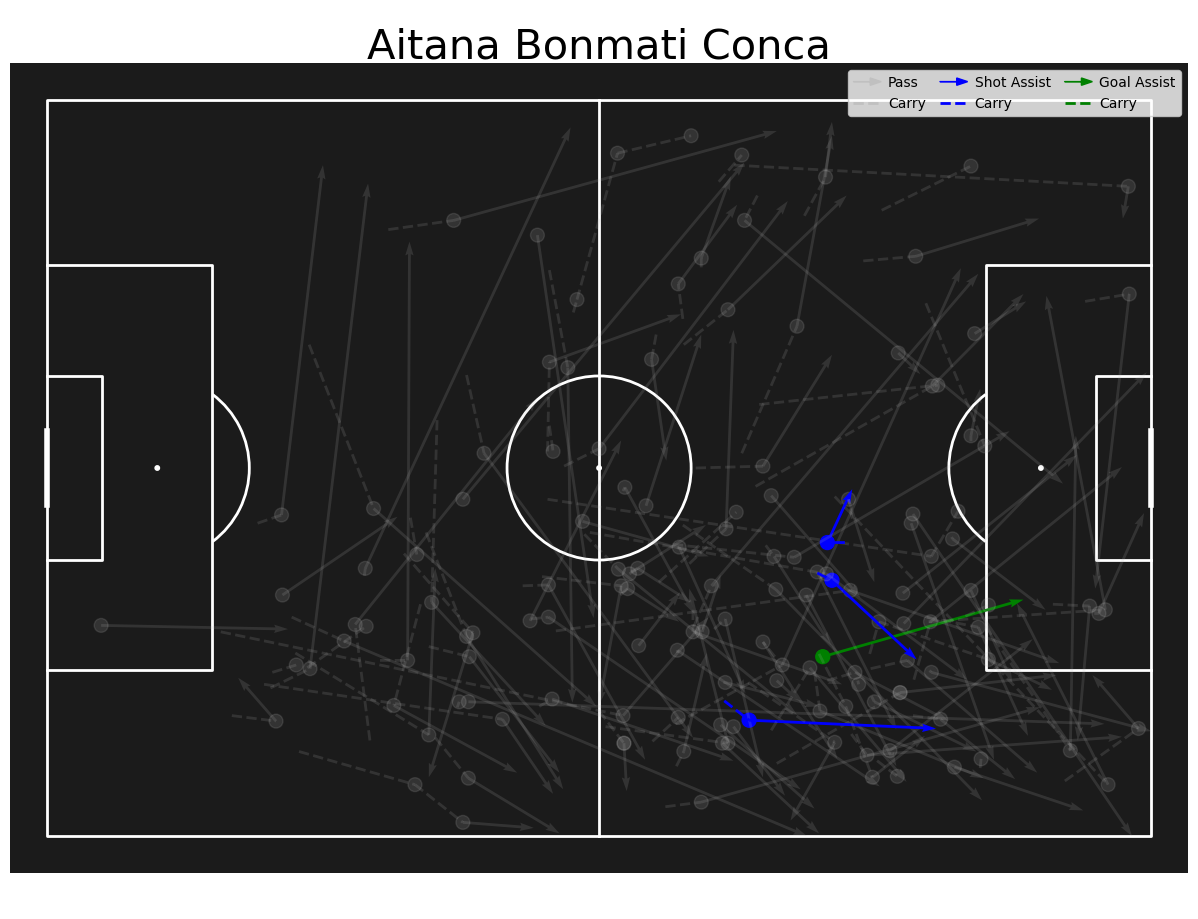

In [77]:
final_third_x = 0
po_matches = [3906390, 3904628, 3902240, 3901733]
match_events = wwc2023_events[wwc2023_events['match_id'].isin(po_matches)].sort_values(by=['match_id', 'index'])

# Passes
pass_not_preceded_by_carry_mask = (
    match_events['type'].eq('Pass') &
    ~(match_events['type'].shift(1).eq('Carry') |
        (match_events['type'].shift(1).isin(events_between_carry_and_pass) &
         match_events['type'].shift(2).eq('Carry')
        )
    )
)

pass_not_preceded_by_carry_df = match_events[pass_not_preceded_by_carry_mask][cols]
forward_pass_not_preceded_by_carry_df = pass_not_preceded_by_carry_df[pass_not_preceded_by_carry_df['location'].apply(lambda x: x[0]) < pass_not_preceded_by_carry_df['pass_end_location'].apply(lambda x: x[0])]
aitana_forward_pass_not_preceded_by_carry_df = forward_pass_not_preceded_by_carry_df[forward_pass_not_preceded_by_carry_df['player'] == player_name]
aitana_finalthird_forward_pass_not_preceded_by_carry_df = aitana_forward_pass_not_preceded_by_carry_df[aitana_forward_pass_not_preceded_by_carry_df['pass_end_location'].apply(lambda x: x[0]) >= final_third_x]

only_pass_start_x = [location[0] for location in aitana_finalthird_forward_pass_not_preceded_by_carry_df['location']]
only_pass_start_y = [location[1] for location in aitana_finalthird_forward_pass_not_preceded_by_carry_df['location']]
only_pass_end_x = [location[0] for location in aitana_finalthird_forward_pass_not_preceded_by_carry_df['pass_end_location']]
only_pass_end_y = [location[1] for location in aitana_finalthird_forward_pass_not_preceded_by_carry_df['pass_end_location']]

only_pass_colors_and_alphas = aitana_finalthird_forward_pass_not_preceded_by_carry_df.apply(determine_color_and_alpha_and_zorder, axis=1)
only_pass_colors, only_pass_alphas, _ = zip(*only_pass_colors_and_alphas)


# Carry + passes
carry_and_pass_mask = (
    (match_events['type'].eq('Carry') & 
     match_events['type'].shift(-1).eq('Pass') &
     match_events['player'].eq(match_events['player'].shift(-1))
    ) |
    (match_events['type'].eq('Carry') & 
     match_events['type'].shift(-1).isin(events_between_carry_and_pass) & 
     match_events['type'].shift(-2).eq('Pass') & 
     match_events['player'].eq(match_events['player'].shift(-2))
    )
)

carry_and_pass_df = match_events[carry_and_pass_mask][cols]
carry_and_pass_df['next_type'] = match_events['type'].shift(-1).where(carry_and_pass_mask)

carry_and_pass_df['pass_location'] = match_events['location'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_location'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['location'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)

carry_and_pass_df['pass_end_location'] = match_events['pass_end_location'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_end_location'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_end_location'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)
carry_and_pass_df['pass_shot_assist'] = match_events['pass_shot_assist'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_shot_assist'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_shot_assist'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)
carry_and_pass_df['pass_goal_assist'] = match_events['pass_goal_assist'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_goal_assist'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_goal_assist'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)
carry_and_pass_df['pass_through_ball'] = match_events['pass_through_ball'].shift(-1).where(carry_and_pass_mask)
carry_and_pass_df['pass_through_ball'].mask(carry_and_pass_df['next_type'].isin(events_between_carry_and_pass), match_events['pass_through_ball'].shift(-2).where(carry_and_pass_mask),
                                        inplace=True)
forward_carry_and_pass_df = carry_and_pass_df[carry_and_pass_df['location'].apply(lambda x: x[0]) < carry_and_pass_df['pass_end_location'].apply(lambda x: x[0])]
aitana_forward_carry_and_pass_df = forward_carry_and_pass_df[forward_carry_and_pass_df['player'] == player_name]
aitana_finalthird_forward_carry_and_pass_df = aitana_forward_carry_and_pass_df[aitana_forward_carry_and_pass_df['pass_end_location'].apply(lambda x: x[0]) >= final_third_x]


carry_start_x = [location[0] for location in aitana_finalthird_forward_carry_and_pass_df['location']]
carry_start_y = [location[1] for location in aitana_finalthird_forward_carry_and_pass_df['location']]
pass_start_x = [location[0] for location in aitana_finalthird_forward_carry_and_pass_df['pass_location']]
pass_start_y = [location[1] for location in aitana_finalthird_forward_carry_and_pass_df['pass_location']]
pass_end_x = [location[0] for location in aitana_finalthird_forward_carry_and_pass_df['pass_end_location']]
pass_end_y = [location[1] for location in aitana_finalthird_forward_carry_and_pass_df['pass_end_location']]

carry_and_pass_colors_and_alphas = aitana_finalthird_forward_carry_and_pass_df.apply(determine_color_and_alpha_and_zorder, axis=1)
carry_and_pass_colors, carry_and_pass_alphas, _ = zip(*carry_and_pass_colors_and_alphas)


# Carrys
carry_mask = match_events['type'].eq('Carry')

carry_not_followed_by_pass_mask = carry_mask & ~carry_and_pass_mask

carry_not_followed_by_pass_df = match_events[carry_not_followed_by_pass_mask][cols]
forward_carry_not_followed_by_pass_df = carry_not_followed_by_pass_df[carry_not_followed_by_pass_df['location'].apply(lambda x: x[0]) < carry_not_followed_by_pass_df['carry_end_location'].apply(lambda x: x[0])]
aitana_forward_carry_not_followed_by_pass_df = forward_carry_not_followed_by_pass_df[forward_carry_not_followed_by_pass_df['player'] == player_name]
aitana_finalthird_forward_carry_not_followed_by_pass_df = aitana_forward_carry_not_followed_by_pass_df[aitana_forward_carry_not_followed_by_pass_df['carry_end_location'].apply(lambda x: x[0]) >= final_third_x]

only_carry_start_x = [location[0] for location in aitana_finalthird_forward_carry_not_followed_by_pass_df['location']]
only_carry_start_y = [location[1] for location in aitana_finalthird_forward_carry_not_followed_by_pass_df['location']]
only_carry_end_x = [location[0] for location in aitana_finalthird_forward_carry_not_followed_by_pass_df['carry_end_location']]
only_carry_end_y = [location[1] for location in aitana_finalthird_forward_carry_not_followed_by_pass_df['carry_end_location']]

only_carry_colors_and_alphas = aitana_finalthird_forward_carry_not_followed_by_pass_df.apply(determine_color_and_alpha_and_zorder, axis=1)
only_carry_colors, only_carry_alphas, _ = zip(*only_carry_colors_and_alphas)


# Plot   
pitch = Pitch(line_color='white', pitch_color=black_color)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot passes
pitch.scatter(only_pass_start_x, only_pass_start_y, alpha=only_pass_alphas, s=circle_size, color=only_pass_colors, ax=ax['pitch'], zorder=1)
pitch.arrows(only_pass_start_x, only_pass_start_y,
             only_pass_end_x, only_pass_end_y,
             color=only_pass_colors, linestyle='-', width=line_width, alpha=only_pass_alphas,
             ax=ax['pitch'], zorder=1)

# Plot carrys
pitch.scatter(only_carry_end_x, only_carry_end_y, alpha=only_carry_alphas, s=circle_size, color=only_carry_colors, ax=ax['pitch'], zorder=1)
pitch.lines(only_carry_start_x, only_carry_start_y, 
            only_carry_end_x, only_carry_end_y,
            color=only_carry_colors, linestyles='--', linewidth=line_width, alpha=only_carry_alphas,
            ax=ax['pitch'], zorder=1)

# Plot carrys + passes
pitch.scatter(pass_start_x, pass_start_y, alpha=carry_and_pass_alphas, s=circle_size, color=carry_and_pass_colors, ax=ax['pitch'], zorder=1)
pitch.arrows(pass_start_x, pass_start_y,
             pass_end_x, pass_end_y,
             color=carry_and_pass_colors, linestyle='-', width=line_width, alpha=carry_and_pass_alphas,
             ax=ax['pitch'], zorder=1)
pitch.lines(carry_start_x, carry_start_y, 
            pass_start_x, pass_start_y,
            color=carry_and_pass_colors, linestyles='--', linewidth=line_width, alpha=carry_and_pass_alphas,
            ax=ax['pitch'], zorder=1)


# Create custom legend elements
legend_elements = [mpatches.FancyArrow(0, 0, 1, 0, color=gray_color),
                   Line2D([0], [0], color=gray_color, lw=2, linestyle='--'),
                   mpatches.FancyArrow(0, 0, 1, 0, color='blue'),
                   Line2D([0], [0], color='blue', lw=2, linestyle='--'),
                   mpatches.FancyArrow(0, 0, 1, 0, color='g'),
                   Line2D([0], [0], color='g', lw=2, linestyle='--')]

# Create a custom legend
legend = ax['pitch'].legend(legend_elements, ['Pass', 'Carry', 'Shot Assist', 'Carry', 'Goal Assist', 'Carry'], 
                            handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)}, 
                            ncol=3, handletextpad=0.5, columnspacing=1, loc='upper right')


fig.suptitle(f"{player_name}", fontsize=30)
plt.savefig(f"img/po_matches.png")
plt.show()

In [58]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

# Custom handler for arrows
def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpatches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p

In [ ]:
# passes_and_carrys = pd.concat([wwc2023_events["carrys"], wwc2023_events["passes"]], axis=0).reset_index(drop=True)
# aitana_match = passes_and_carrys[(passes_and_carrys.player == "Aitana Bonmati Conca") & (passes_and_carrys.match_id == match_id)]
# aitana_match.columns

In [ ]:
carry_and_pass_mask = aitana_match['type'].eq('Carry') & aitana_match['type'].shift(-1).eq('Pass')
aitana_match[carry_and_pass_mask]

In [ ]:
aitana_match[aitana_match['index'].isin([3287, 3288])][cols]

In [ ]:
carrys = wwc2023_events["carrys"]
passes = wwc2023_events["passes"]

In [ ]:
aitana_match_carrys_mask = (carrys.player == player_name) & (carrys.match_id == match_id)
aitana_match_carrys = carrys[aitana_match_carrys_mask]

In [ ]:
aitana_match_passes_mask = (passes.player == player_name) & (passes.match_id == match_id)
aitana_match_passes = passes[aitana_match_passes_mask]

In [ ]:
aitana_match_passes.index

In [ ]:
uuid = '5d3b3608-7cf4-4c4b-895a-abf2ccae2aa0'
aitana_match_passes[aitana_match_passes['id'] == uuid]

In [ ]:
cols = ['id', 'location', 'carry_end_location']
aitana_match_carrys[cols]

In [ ]:
aitana_match_carrys[['id', 'related_events', 'related_pass_event']]

In [ ]:
aitana_match['related_events']

In [ ]:
wwc2023_events["carrys"]

In [ ]:
wwc2023_events["passes"]

In [ ]:
wwc2023_events = sb.competition_events(
    country=wwc2023['country_name'].iloc[0],
    division=wwc2023['competition_name'].iloc[0],
    season=wwc2023['season_name'].iloc[0],
    gender=wwc2023['competition_gender'].iloc[0]
)
wwc2023_team_events = wwc2023_events[wwc2023_events['team'] == team_name]
wwc2023_team_events

In [ ]:
wwc2023_team_events.type.unique()

In [ ]:
passes_df = wwc2023_team_events[wwc2023_team_events.type == 'Pass']
passes_df

In [ ]:
passes_df.groupby('match_id').size().reset_index(name='count')

In [ ]:
for column in passes_df.columns:
    print(column)

In [ ]:
cols = ['id', 'player_id', 'location', 'match_id', 'timestamp', 'pass_body_part', 'pass_end_location', 'pass_height', 'pass_outcome', 'pass_shot_assist', 'pass_goal_assist', 'pass_through_ball', 'pass_type', 'under_pressure']
cols

In [ ]:
passes_df[cols].pass_body_part.unique()

In [ ]:
passes_df[cols].pass_outcome.unique()

In [ ]:
passes_df[cols].pass_through_ball.unique()

In [ ]:
passes_df[cols].pass_type.unique()

In [ ]:
passes_df[cols].under_pressure.unique()

In [ ]:
events.info()

In [ ]:
events.type.unique()

In [ ]:
shot_events = events[events['type'] == 'Shot']
shot_events['end_z'].max()

In [ ]:
shot_events['shot_end_location']

In [ ]:
related

In [ ]:
help(parser)